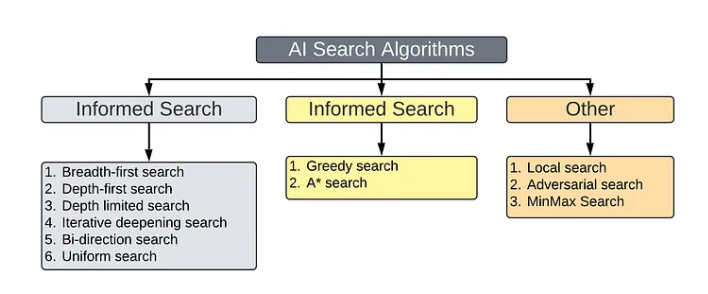

# **Pandas Library**

Pandas is a very popular library for working with data. Pandas has helpful functions for handling missing data, performing operations on columns and rows, and transforming data. If that wasn’t enough, a lot of SQL functions have counterparts in pandas, such as join, merge, filter by, and group by. With all of these powerful tools, it should come as no surprise that pandas is very popular among data scientists.

# **Numpy Library**

NumPy is an open-source Python library that facilitates efficient numerical operations on large quantities of data. There are a few functions that exist in NumPy that we use on pandas DataFrames. For us, the most important part about NumPy is that pandas is built on top of it. So, NumPy is a dependency of Pandas.

# **Travelling Salesman Problem**

Travelling Salesman Problem (TSP) is a classic combinatorics problem of theoretical computer science. The problem asks to find the shortest path in a graph with the condition of visiting all the nodes only one time and returning to the origin city.

***Objective***: To start from the origin city, visit other cities only once, and return to the original city again. Our target is to find the shortest possible path to complete the round-trip route.

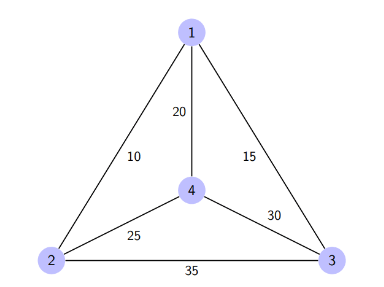

For the above graph, the optimal route is to follow the minimum cost path: 1-2-4-3-1. And this shortest route would cost 10+25+30+15 =80

Implementation of Travelling Salesman Problem Using Genetic Algorithm (Searching Agorithm)

In [11]:
# Imports 
import numpy as np
import random

from datetime import datetime

In [12]:
# Parameters
n_cities = 20

n_population = 100

mutation_rate = 0.3

In [13]:
# Generating a list of coordenades representing each city
coordinates_list = [[x,y] for x,y in zip(np.random.randint(0,100,n_cities),np.random.randint(0,100,n_cities))]
names_list = np.array(['Berlin', 'London', 'Moscow', 'Barcelona', 'Rome', 'Paris', 'Vienna', 'Munich', 'Istanbul', 'Kyiv', 'Bucharest', 'Minsk', 'Warsaw', 'Budapest', 'Milan', 'Prague', 'Sofia', 'Birmingham', 'Brussels', 'Amsterdam'])
cities_dict = { x:y for x,y in zip(names_list,coordinates_list)}

# Function to compute the distance between two points
def compute_city_distance_coordinates(a,b):
    return ((a[0]-b[0])**2+(a[1]-b[1])**2)**0.5

def compute_city_distance_names(city_a, city_b, cities_dict):
    return compute_city_distance_coordinates(cities_dict[city_a], cities_dict[city_b])

cities_dict    

compute_city_distance_names()

{'Berlin': [83, 14],
 'London': [47, 68],
 'Moscow': [91, 92],
 'Barcelona': [91, 33],
 'Rome': [12, 97],
 'Paris': [0, 49],
 'Vienna': [36, 48],
 'Munich': [75, 65],
 'Istanbul': [2, 94],
 'Kyiv': [55, 84],
 'Bucharest': [6, 73],
 'Minsk': [49, 78],
 'Warsaw': [33, 32],
 'Budapest': [91, 60],
 'Milan': [16, 91],
 'Prague': [52, 37],
 'Sofia': [81, 87],
 'Birmingham': [42, 31],
 'Brussels': [45, 86],
 'Amsterdam': [41, 54]}

**1. Create the first population set**

We randomly shuffle the cities N times where N=population_size

In [ ]:
# First step: Create the first population set
def genesis(city_list, n_population):

    population_set = []
    for i in range(n_population):
        #Randomly generating a new solution
        sol_i = city_list[np.random.choice(list(range(n_cities)), n_cities, replace=False)]
        population_set.append(sol_i)
    return np.array(population_set)

population_set = genesis(names_list, n_population)
population_set

array([['Milan', 'Barcelona', 'Budapest', ..., 'Berlin', 'Prague',
        'London'],
       ['Warsaw', 'Rome', 'Sofia', ..., 'Munich', 'London', 'Amsterdam'],
       ['Moscow', 'Berlin', 'Milan', ..., 'London', 'Minsk', 'Amsterdam'],
       ...,
       ['Amsterdam', 'London', 'Minsk', ..., 'Warsaw', 'Rome', 'Moscow'],
       ['Munich', 'Brussels', 'Berlin', ..., 'Bucharest', 'Rome',
        'Paris'],
       ['London', 'Rome', 'Amsterdam', ..., 'Minsk', 'Milan', 'Moscow']],
      dtype='<U10')

**2. Evaluate solutions fitness**

The solutions are defined so that the first element on the list is the first city to visit, then the second, etc. and the last city is linked to the first. The fitness function needs to compute the distance between subsequent cities.

In [ ]:
def fitness_eval(city_list, cities_dict):
    total = 0
    for i in range(n_cities-1):
        a = city_list[i]
        b = city_list[i+1]
        total += compute_city_distance_names(a,b, cities_dict)
    return total

In [ ]:
def get_all_fitnes(population_set, cities_dict):
    fitnes_list = np.zeros(n_population)

    #Looping over all solutions computing the fitness for each solution
    for i in  range(n_population):
        fitnes_list[i] = fitness_eval(population_set[i], cities_dict)

    return fitnes_list

fitnes_list = get_all_fitnes(population_set,cities_dict)
fitnes_list

array([795.72604766, 975.34611511, 944.69378487, 772.52157994,
       949.45770965, 846.12616801, 802.38329407, 774.08143758,
       806.79978505, 857.77665026, 733.25810519, 800.17625855,
       727.48970607, 723.514319  , 798.70711063, 728.69282091,
       808.57756138, 756.71622316, 875.50421132, 834.06150919,
       838.92221024, 895.05746416, 754.10016998, 945.22704532,
       825.89990455, 727.15526656, 711.95587352, 915.13709788,
       808.93684124, 779.96306067, 910.05863865, 868.44229353,
       829.09783222, 742.80888447, 815.69481787, 819.73875981,
       827.3494297 , 766.8281851 , 906.07960106, 842.24238196,
       746.94176191, 953.54321499, 806.7357484 , 718.81711514,
       870.91979789, 707.14095837, 720.20255441, 764.33464353,
       860.13949045, 830.82178261, 843.31611862, 790.91120357,
       901.43257364, 742.81473167, 795.65148376, 872.15818675,
       876.40940165, 722.59003414, 886.66779771, 744.18367254,
       845.06593369, 745.16204075, 834.29788209, 825.55

**3. Progenitors selection**

I will select a new set of progenitors using the Roulette Wheel Selection. Generates a list of progenitor pairs where N= len(population_set) but at each position there are two solutions to merge

In [ ]:
def progenitor_selection(population_set,fitnes_list):
    total_fit = fitnes_list.sum()
    prob_list = fitnes_list/total_fit
    
    #Notice there is the chance that a progenitor. mates with oneself
    progenitor_list_a = np.random.choice(list(range(len(population_set))), len(population_set),p=prob_list, replace=True)
    progenitor_list_b = np.random.choice(list(range(len(population_set))), len(population_set),p=prob_list, replace=True)
    
    progenitor_list_a = population_set[progenitor_list_a]
    progenitor_list_b = population_set[progenitor_list_b]
    
    
    return np.array([progenitor_list_a,progenitor_list_b])


progenitor_list = progenitor_selection(population_set,fitnes_list)
progenitor_list[0][2]

array(['Moscow', 'London', 'Paris', 'Milan', 'Kyiv', 'Bucharest',
       'Istanbul', 'Birmingham', 'Amsterdam', 'Minsk', 'Brussels',
       'Munich', 'Prague', 'Berlin', 'Sofia', 'Vienna', 'Budapest',
       'Warsaw', 'Rome', 'Barcelona'], dtype='<U10')

**4. Mating**

For each pair of parents we'll generate an offspring pair. Since we cannot repeat cities what we'll do is copy a random chunk from one progenitor and fill the blanks with the other progenitor.

In [ ]:
def mate_progenitors(prog_a, prog_b):
    offspring = prog_a[0:5]

    for city in prog_b:

        if not city in offspring:
            offspring = np.concatenate((offspring,[city]))

    return offspring
            
    
    
def mate_population(progenitor_list):
    new_population_set = []
    for i in range(progenitor_list.shape[1]):
        prog_a, prog_b = progenitor_list[0][i], progenitor_list[1][i]
        offspring = mate_progenitors(prog_a, prog_b)
        new_population_set.append(offspring)
        
    return new_population_set

new_population_set = mate_population(progenitor_list)
new_population_set[0]

array(['Barcelona', 'Amsterdam', 'Brussels', 'Paris', 'Munich', 'Warsaw',
       'Minsk', 'Vienna', 'Moscow', 'Prague', 'Birmingham', 'Sofia',
       'Berlin', 'Milan', 'Budapest', 'Rome', 'Istanbul', 'Bucharest',
       'Kyiv', 'London'], dtype='<U10')

**5. Mutation**

Now for each element of the new population we add a random chance of swapping

In [ ]:
def mutate_offspring(offspring):
    for q in range(int(n_cities*mutation_rate)):
        a = np.random.randint(0,n_cities)
        b = np.random.randint(0,n_cities)

        offspring[a], offspring[b] = offspring[b], offspring[a]

    return offspring
    
    
def mutate_population(new_population_set):
    mutated_pop = []
    for offspring in new_population_set:
        mutated_pop.append(mutate_offspring(offspring))
    return mutated_pop

mutated_pop = mutate_population(new_population_set)
mutated_pop[0]

array(['Barcelona', 'Minsk', 'Brussels', 'Paris', 'Milan', 'Amsterdam',
       'Berlin', 'Prague', 'Moscow', 'Bucharest', 'Birmingham', 'Sofia',
       'Warsaw', 'Munich', 'Budapest', 'Rome', 'Istanbul', 'Vienna',
       'Kyiv', 'London'], dtype='<U10')

**6. Stopping**

To select the stopping criteria we'll need to create a loop to stop first. Then I'll set it to loop at 1000 iterations.

In [ ]:
best_solution = [-1,np.inf,np.array([])]
for i in range(10000):
    if i%100==0: print(i, fitnes_list.min(), fitnes_list.mean(), datetime.now().strftime("%d/%m/%y %H:%M"))
    fitnes_list = get_all_fitnes(mutated_pop,cities_dict)
    
    #Saving the best solution
    if fitnes_list.min() < best_solution[1]:
        best_solution[0] = i
        best_solution[1] = fitnes_list.min()
        best_solution[2] = np.array(mutated_pop)[fitnes_list.min() == fitnes_list]
    
    progenitor_list = progenitor_selection(population_set,fitnes_list)
    new_population_set = mate_population(progenitor_list)
    
    mutated_pop = mutate_population(new_population_set)

0 661.6258451362743 816.543669479675 28/03/23 04:40
100 614.0318860235309 819.470113664629 28/03/23 04:40
200 623.6756959108529 824.8127403864935 28/03/23 04:40
300 667.6819541566778 815.4320832853695 28/03/23 04:41
400 623.6857483197049 808.8295553723849 28/03/23 04:41
500 659.9800271488889 836.2713344955035 28/03/23 04:41
600 625.2973047042426 808.4304968924573 28/03/23 04:41
700 628.5997443910179 809.698872782714 28/03/23 04:41
800 628.0931128698348 816.6931487117228 28/03/23 04:41
900 558.7532589013445 826.737507098731 28/03/23 04:41
1000 607.3606169342097 812.1426983057387 28/03/23 04:41
1100 648.223711868248 828.5327421808793 28/03/23 04:41
1200 572.991849005234 818.2105633910868 28/03/23 04:41
1300 570.3951343144148 822.828410726318 28/03/23 04:41
1400 635.9578495596054 820.8683988786944 28/03/23 04:41
1500 641.6258685508611 812.7550800868174 28/03/23 04:41
1600 633.8086897899072 821.6564322164649 28/03/23 04:41
1700 664.3547593009666 828.780789087082 28/03/23 04:41
1800 607.645

In [ ]:
best_solution

[7912,
 556.7793174701194,
 array([['Milan', 'Amsterdam', 'Brussels', 'Rome', 'Prague', 'Sofia',
         'Moscow', 'Kyiv', 'Minsk', 'Warsaw', 'Munich', 'Birmingham',
         'Barcelona', 'Budapest', 'Vienna', 'Istanbul', 'Bucharest',
         'Paris', 'London', 'Berlin']], dtype='<U10')]